<a href="https://colab.research.google.com/github/2303A52413/STAT_2303A52413/blob/main/STAT_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question-1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
d=pd.read_csv('/Salary_Data.csv')
print(d)


    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [6]:
y = d['Salary']
X = d.drop('Salary', axis=1)
print("Features:", X)
print("Target:", y)

Features:     YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
Target: 0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train:     YearsExperience
28             10.3
24              8.7
12              4.0
0               1.1
4               2.2
16              5.1
5               2.9
13              4.1
11              4.0
22              7.9
1               1.3
2               1.5
25              9.0
3               2.0
21              7.1
26              9.5
18              5.9
29             10.5
20              6.8
7               3.2
10              3.9
14              4.5
19              6.0
6               3.0
X_test:     YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7
y_train: 28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19  

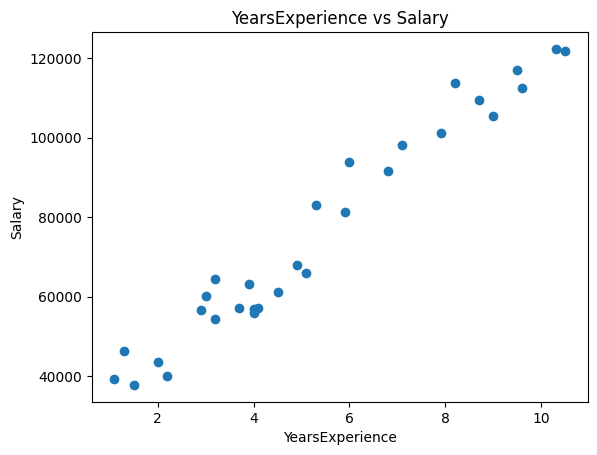

In [9]:
plt.scatter(d['YearsExperience'], d['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.show()

In [10]:
x_norm = (X - X.min()) / (X.max() - X.min())
print(x_norm)


    YearsExperience
0          0.000000
1          0.021277
2          0.042553
3          0.095745
4          0.117021
5          0.191489
6          0.202128
7          0.223404
8          0.223404
9          0.276596
10         0.297872
11         0.308511
12         0.308511
13         0.319149
14         0.361702
15         0.404255
16         0.425532
17         0.446809
18         0.510638
19         0.521277
20         0.606383
21         0.638298
22         0.723404
23         0.755319
24         0.808511
25         0.840426
26         0.893617
27         0.904255
28         0.978723
29         1.000000


Mean Squared Error: 52876610.79496228


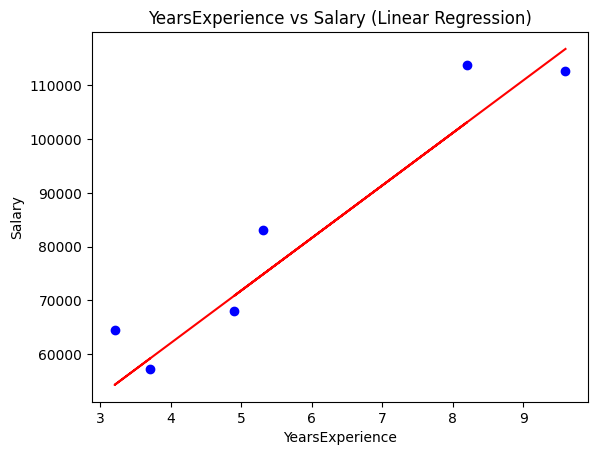

In [11]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train.values, y_train.values)

y_pred = model.predict(X_test.values)

mse = np.mean((y_test - y_pred)**2)
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("Mean Squared Error:", mse)

plt.scatter(X_test['YearsExperience'], y_test, color='blue')
plt.plot(X_test['YearsExperience'], y_pred, color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary (Linear Regression)')
plt.show()

In [12]:
def evaluate_model(test_size):
  X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=test_size, random_state=42)
  model = LinearRegression(learning_rate=0.01, n_iterations=1000)
  model.fit(X_train.values, y_train.values)
  y_pred = model.predict(X_test.values)
  mse = np.mean((y_test - y_pred)**2)
  mae = np.mean(np.abs(y_test - y_pred))
  print(f"For test size {test_size * 100}%:")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Mean Absolute Error (MAE): {mae}")
  print( )
evaluate_model(0.2)
evaluate_model(0.25)


For test size 20.0%:
Mean Squared Error (MSE): 96780841.65129642
Mean Absolute Error (MAE): 8400.094945073302

For test size 25.0%:
Mean Squared Error (MSE): 161500378.323649
Mean Absolute Error (MAE): 11105.151426437278



# Question-2

In [19]:
df = pd.DataFrame({
   'Feature1': [1.2, 2.4, 3.5, 4.1, 1.9, 3.7, 2.1, 3.3, 2.8, 4],
    'Feature2': [2.3, 1.9, 2.7, 3, 2.8, 2.5, 3.2, 2.4, 3.1, 3.3],
     'Feature3': [3.1, 2.8, 1.5, 3.6, 2.5, 1.9, 2.2, 3, 1.8, 2.7],
      'Feature4': [4.2, 3.5, 2.9, 4.8, 3.2, 4, 4.1, 4.5, 3.6, 4.9],
       'Target': [15.6, 13.1, 12.4, 18.2, 14.1, 16, 14.5, 17.3, 14.9,
       19.2]
       })
print(df)

   Feature1  Feature2  Feature3  Feature4  Target
0       1.2       2.3       3.1       4.2    15.6
1       2.4       1.9       2.8       3.5    13.1
2       3.5       2.7       1.5       2.9    12.4
3       4.1       3.0       3.6       4.8    18.2
4       1.9       2.8       2.5       3.2    14.1
5       3.7       2.5       1.9       4.0    16.0
6       2.1       3.2       2.2       4.1    14.5
7       3.3       2.4       3.0       4.5    17.3
8       2.8       3.1       1.8       3.6    14.9
9       4.0       3.3       2.7       4.9    19.2


In [20]:
y = df['Target']
X = df.drop('Target', axis=1)
print("Features:", X)
print("Target:", y)

Features:    Feature1  Feature2  Feature3  Feature4
0       1.2       2.3       3.1       4.2
1       2.4       1.9       2.8       3.5
2       3.5       2.7       1.5       2.9
3       4.1       3.0       3.6       4.8
4       1.9       2.8       2.5       3.2
5       3.7       2.5       1.9       4.0
6       2.1       3.2       2.2       4.1
7       3.3       2.4       3.0       4.5
8       2.8       3.1       1.8       3.6
9       4.0       3.3       2.7       4.9
Target: 0    15.6
1    13.1
2    12.4
3    18.2
4    14.1
5    16.0
6    14.5
7    17.3
8    14.9
9    19.2
Name: Target, dtype: float64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train:    Feature1  Feature2  Feature3  Feature4
5       3.7       2.5       1.9       4.0
0       1.2       2.3       3.1       4.2
7       3.3       2.4       3.0       4.5
2       3.5       2.7       1.5       2.9
9       4.0       3.3       2.7       4.9
4       1.9       2.8       2.5       3.2
3       4.1       3.0       3.6       4.8
6       2.1       3.2       2.2       4.1
X_test:    Feature1  Feature2  Feature3  Feature4
8       2.8       3.1       1.8       3.6
1       2.4       1.9       2.8       3.5
y_train: 5    16.0
0    15.6
7    17.3
2    12.4
9    19.2
4    14.1
3    18.2
6    14.5
Name: Target, dtype: float64
y_test: 8    14.9
1    13.1
Name: Target, dtype: float64


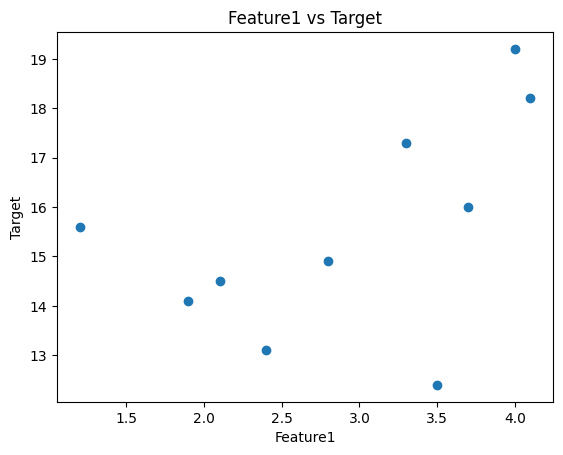

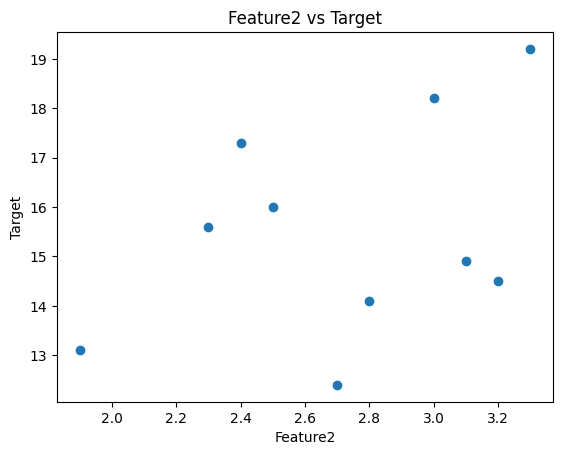

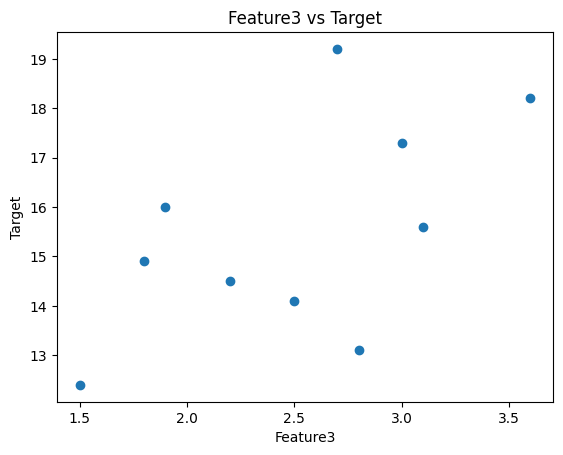

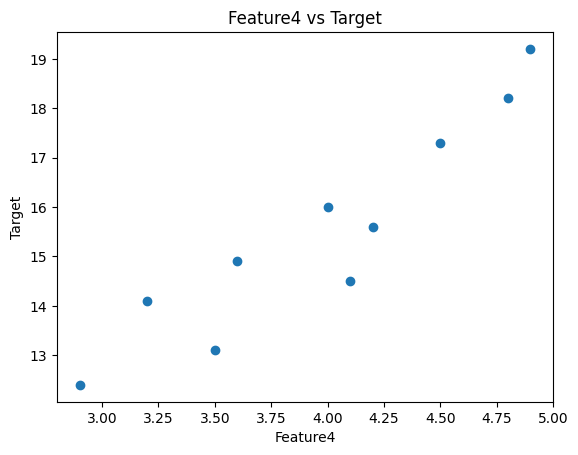

In [22]:
for feature in X.columns:
  plt.scatter(X[feature], y)
  plt.xlabel(feature)
  plt.ylabel('Target')
  plt.title(f'{feature} vs Target')
  plt.show()

In [23]:
x_norm = (X - X.min()) / (X.max() - X.min())
print(x_norm)

   Feature1  Feature2  Feature3  Feature4
0  0.000000  0.285714  0.761905      0.65
1  0.413793  0.000000  0.619048      0.30
2  0.793103  0.571429  0.000000      0.00
3  1.000000  0.785714  1.000000      0.95
4  0.241379  0.642857  0.476190      0.15
5  0.862069  0.428571  0.190476      0.55
6  0.310345  0.928571  0.333333      0.60
7  0.724138  0.357143  0.714286      0.80
8  0.551724  0.857143  0.142857      0.35
9  0.965517  1.000000  0.571429      1.00


In [24]:
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train.values, y_train.values)

y_pred = model.predict(X_test.values)

mse = np.mean((y_test - y_pred)**2)
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("Mean Squared Error:", mse)

Mean Squared Error: 0.4573193689890454


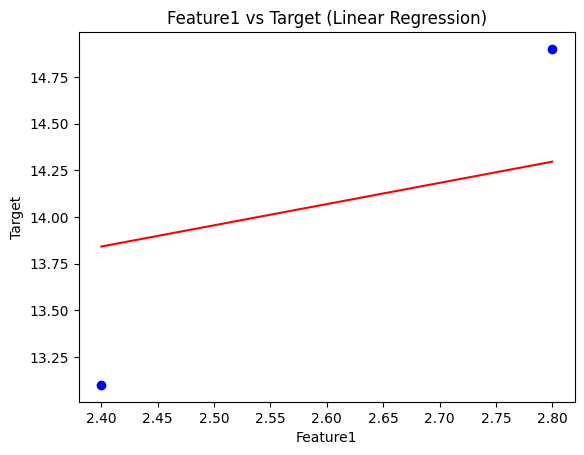

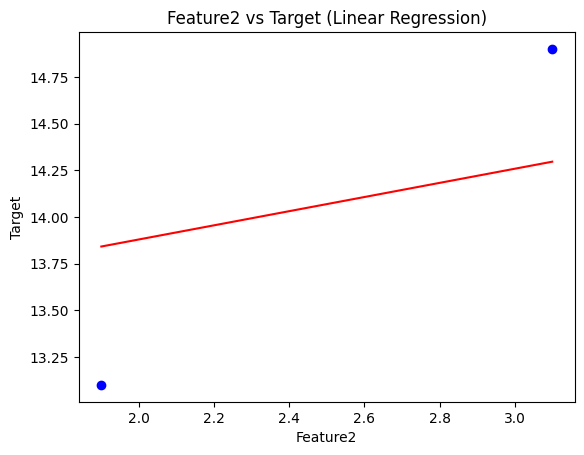

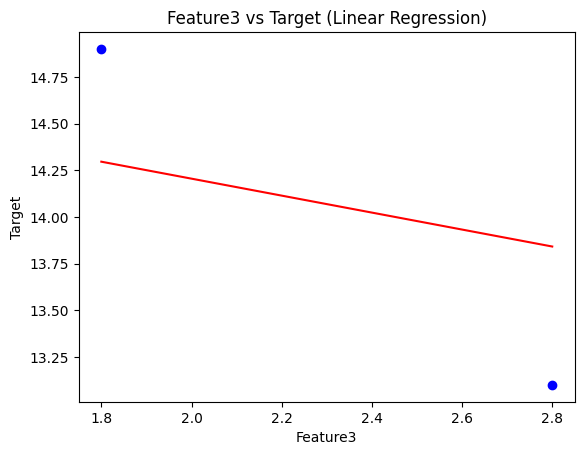

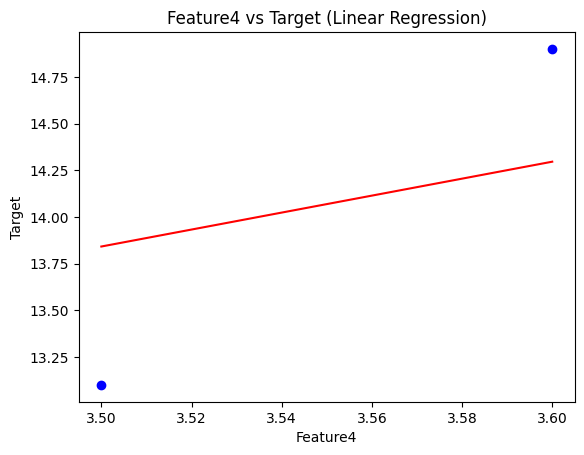

In [25]:
for feature in X.columns:
  plt.scatter(X_test[feature], y_test, color='blue')
  plt.plot(X_test[feature], y_pred, color='red')
  plt.xlabel(feature)
  plt.ylabel('Target')
  plt.title(f'{feature} vs Target (Linear Regression)')
  plt.show()

In [26]:
evaluate_model(0.2)
evaluate_model(0.3)

For test size 20.0%:
Mean Squared Error (MSE): 0.258003375647776
Mean Absolute Error (MAE): 0.48971056910292443

For test size 30.0%:
Mean Squared Error (MSE): 1.5622645962312347
Mean Absolute Error (MAE): 1.0986230970292687

